In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mlxtend.evaluate import bias_variance_decomp
from sklearn.metrics import r2_score, explained_variance_score

In [2]:
numpoints = 10
X = np.random.rand(numpoints).reshape((numpoints, 1))
#print(X)
sigma = 0.3
y = X*3.4 + 3 + np.random.normal(0, sigma, (numpoints,1))
reg = LinearRegression().fit(X, y)

#mse, bias, var = bias_variance_decomp(reg, X, y.flatten(), X, y.flatten(), loss='mse', num_rounds=2000, random_seed=1)
#print((mse, bias, var))

reg.score(X, y)
#print(y)

0.8779637341992272

In [3]:
print(reg.coef_)
print(reg.predict(np.array([[3]])))


[[3.09885802]]
[[12.45904853]]


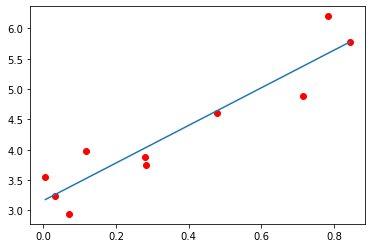

In [4]:
plt.plot(X.flatten(), y, 'ro')
X_max = np.max(X.flatten())
X_min = np.min(X.flatten())
Y2 = reg.predict([[X_max]]).flatten()[0]
Y1 = reg.predict([[X_min]]).flatten()[0]
plt.plot([X_min, X_max], [Y1, Y2])
#print(y)

In [5]:
Y = reg.predict(X).flatten()
Y_hat = y.flatten()
#print(Y_hat)

# Metrics 

SSE = $\sum_{i = 1}^{N}(y_{i} - \hat{y}_i)^{2}$   
SSTotal = $\sum_{i = 1}^{N}(y_{i} - \bar{y}_i)^{2}$  
MSE = $\frac{SSE}{N}$     
RWSE = $\sqrt{MSE}$   
MAE = $\frac{\sum_{i = 1}^{N}abs(\hat{y} - y_{i})}{N}$   
$R^{2}$ score = $1 - \frac{SSE}{SSTotal}$    
Explained variance score = 1 - $\frac{Var[y - \hat{y}]}{Var[y]}$   

In [6]:
#Y = np.array([2.5, 0.0, 2, 8])
#Y_hat = np.array([3, -0.5, 2, 7])
SSE = np.sum((Y - Y_hat) ** 2)
SSTotal = np.sum((Y - Y.mean()) ** 2)
MSE = SSE / numpoints
print("MSE %.50f" % (MSE)) 
R2 = 1-(SSE/SSTotal)
print("R2 %.50f" % (R2))
print("R2 %.50f" % (r2_score(Y, Y_hat)))

error = Y_hat - Y
ExplainedVariance = 1 - np.var(Y_hat - Y)/np.var(Y) 
print("ExplainedVariance %.50f" % (ExplainedVariance))
print("ExplainedVariance %.50f" % (explained_variance_score(Y, Y_hat)))

MSE 0.12608137192613261268192559327872004359960556030273
R2 0.86100078961452819470423492020927369594573974609375
R2 0.86100078961452819470423492020927369594573974609375
ExplainedVariance 0.86100078961452819470423492020927369594573974609375
ExplainedVariance 0.86100078961452819470423492020927369594573974609375


# Bias-Variance Trade-Off 

\begin{aligned}\operatorname {E} {\big [}(y-{\hat {f}})^{2}{\big ]}&=\operatorname {E} {\big [}(f+\varepsilon -{\hat {f}})^{2}{\big ]}\\[5pt]&=\operatorname {E} {\big [}(f+\varepsilon -{\hat {f}}+\operatorname {E} [{\hat {f}}]-\operatorname {E} [{\hat {f}}])^{2}{\big ]}\\[5pt]&=\operatorname {E} {\big [}(f-\operatorname {E} [{\hat {f}}])^{2}{\big ]}+\operatorname {E} [\varepsilon ^{2}]+\operatorname {E} {\big [}(\operatorname {E} [{\hat {f}}]-{\hat {f}})^{2}{\big ]}+2\operatorname {E} {\big [}(f-\operatorname {E} [{\hat {f}}])\varepsilon {\big ]}+2\operatorname {E} {\big [}\varepsilon (\operatorname {E} [{\hat {f}}]-{\hat {f}}){\big ]}+2\operatorname {E} {\big [}(\operatorname {E} [{\hat {f}}]-{\hat {f}})(f-\operatorname {E} [{\hat {f}}]){\big ]}\\[5pt]&=(f-\operatorname {E} [{\hat {f}}])^{2}+\operatorname {E} [\varepsilon ^{2}]+\operatorname {E} {\big [}(\operatorname {E} [{\hat {f}}]-{\hat {f}})^{2}{\big ]}+2(f-\operatorname {E} [{\hat {f}}])\operatorname {E} [\varepsilon ]+2\operatorname {E} [\varepsilon ]\operatorname {E} {\big [}\operatorname {E} [{\hat {f}}]-{\hat {f}}{\big ]}+2\operatorname {E} {\big [}\operatorname {E} [{\hat {f}}]-{\hat {f}}{\big ]}(f-\operatorname {E} [{\hat {f}}])\\[5pt]&=(f-\operatorname {E} [{\hat {f}}])^{2}+\operatorname {E} [\varepsilon ^{2}]+\operatorname {E} {\big [}(\operatorname {E} [{\hat {f}}]-{\hat {f}})^{2}{\big ]}\\[5pt]&=(f-\operatorname {E} [{\hat {f}}])^{2}+\operatorname {Var} [\varepsilon ]+\operatorname {Var} {\big [}{\hat {f}}{\big ]}\\[5pt]&=\operatorname {Bias} [{\hat {f}}]^{2}+\operatorname {Var} [\varepsilon ]+\operatorname {Var} {\big [}{\hat {f}}{\big ]}\\[5pt]&=\operatorname {Bias} [{\hat {f}}]^{2}+\sigma ^{2}+\operatorname {Var} {\big [}{\hat {f}}{\big ]}.\end{aligned}  


$${\text{MSE}}=\operatorname {E} _{x}{\bigg \{}\operatorname {Bias} _{D}[{\hat {f}}(x;D)]^{2}+\operatorname {Var} _{D}{\big [}{\hat {f}}(x;D){\big ]}{\bigg \}}+\sigma ^{2}.$$